<a href="https://colab.research.google.com/github/richa11101982/AI-mergency/blob/master/Stock_Price_Prediction_using_Python_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Stock price prediction using python and machine learning

In [2]:
#Description : This program uses an artificial recurrent neural network called
#Long Short Term Memory(LSTM), to predict the closing stock price of a corporation
#(Apple Inc.)
#using the past 60 days stock price.

In [6]:
# import libraries
!pip install pandas_datareader
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
# Get the Stock Data
df = web.DataReader('AAPL', data_source = 'stooq', start = '2012-01-01', end = '2019-12-17')

# show the data
df

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-17,68.4731,69.0125,68.2837,68.6765,1.166743e+08
2019-12-16,67.8401,68.7722,67.8361,68.5449,1.309864e+08
2019-12-13,66.4862,67.4273,66.3556,67.3914,1.365054e+08
2019-12-12,65.5859,66.7544,65.4723,66.4862,1.406056e+08
2019-12-11,65.8372,66.3975,65.7604,66.3177,8.053014e+07
...,...,...,...,...,...
2012-01-09,12.9525,13.0213,12.8289,12.8408,4.620092e+08
2012-01-06,12.7800,12.8717,12.7630,12.8608,3.734286e+08
2012-01-05,12.6314,12.7422,12.5627,12.7272,3.178972e+08


In [12]:
# Get the number of rows and columns in the data set
df.shape

(2003, 5)

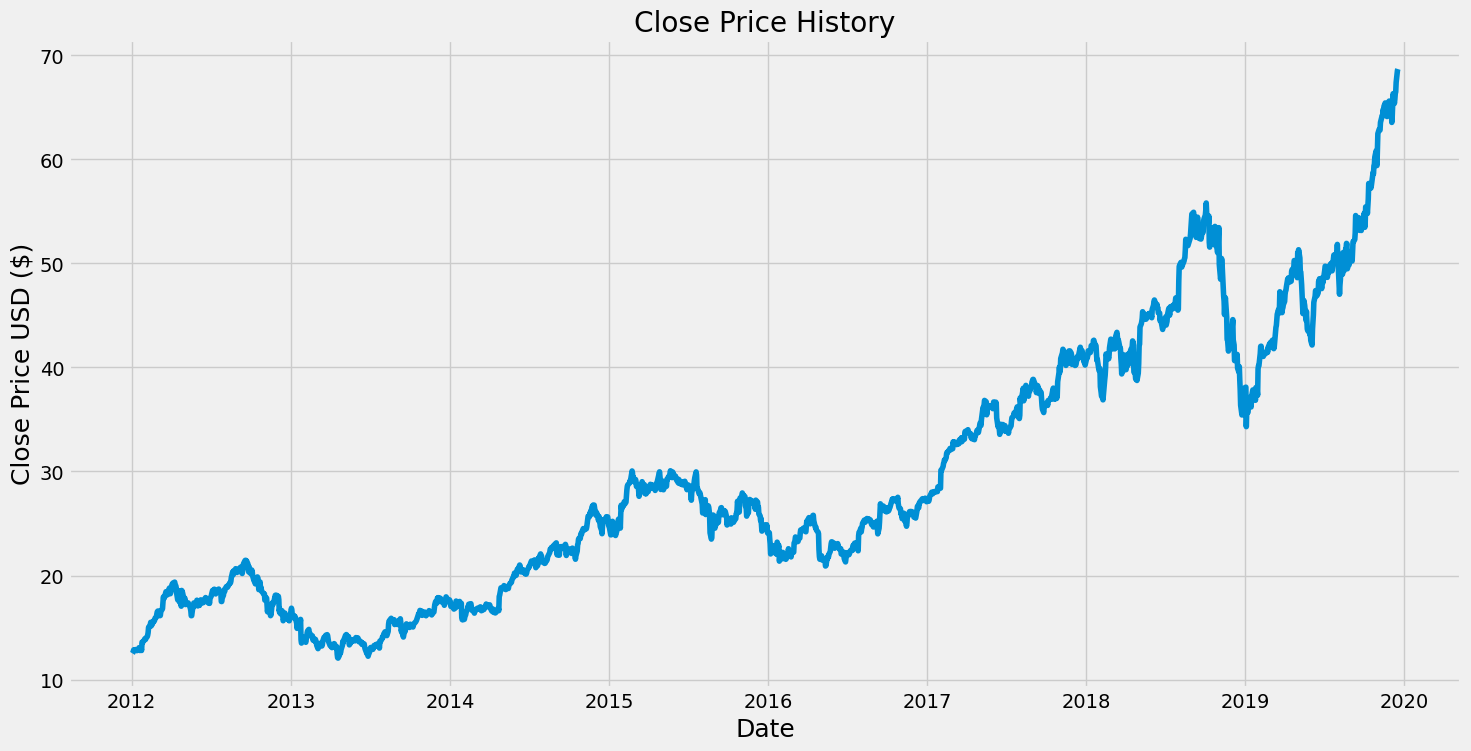

In [13]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [19]:
# Create a new data frame with only the 'Close column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len


1603

In [20]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[1.        ],
       [0.99767542],
       [0.97729999],
       ...,
       [0.01171124],
       [0.00922768],
       [0.00804772]])

In [22]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for  i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([1.        , 0.99767542, 0.97729999, 0.96131053, 0.95833414,
       0.94840167, 0.94163989, 0.95806918, 0.9358461 , 0.91927549,
       0.90937835, 0.92971845, 0.9431007 , 0.94565492, 0.93028017,
       0.93926232, 0.91939737, 0.92038479, 0.92556211, 0.93892847,
       0.94245067, 0.93658445, 0.92316687, 0.93107328, 0.92017282,
       0.9212309 , 0.91230174, 0.90929003, 0.89643417, 0.89593957,
       0.89756113, 0.89030652, 0.85987497, 0.83617341, 0.83631119,
       0.86110792, 0.85048832, 0.83757947, 0.83582013, 0.82194329,
       0.82423254, 0.80660387, 0.80172683, 0.79785312, 0.80190171,
       0.80424572, 0.80572243, 0.77936067, 0.7661003 , 0.754813  ,
       0.76622395, 0.76599608, 0.73943825, 0.73130221, 0.75563968,
       0.75292825, 0.73074049, 0.7353349 , 0.74033735, 0.72587759])]
[0.7302812286375929]

[array([1.        , 0.99767542, 0.97729999, 0.96131053, 0.95833414,
       0.94840167, 0.94163989, 0.95806918, 0.9358461 , 0.91927549,
       0.90937835, 0.92971845, 0.943

In [23]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [26]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 70s 40ms/step - loss: 0.0014


In [29]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [30]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [31]:
# Reshaoe the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [32]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 16ms/step


In [33]:
# Get the root mean square error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.19982287508010863

<ipython-input-35-e2dded75ee1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


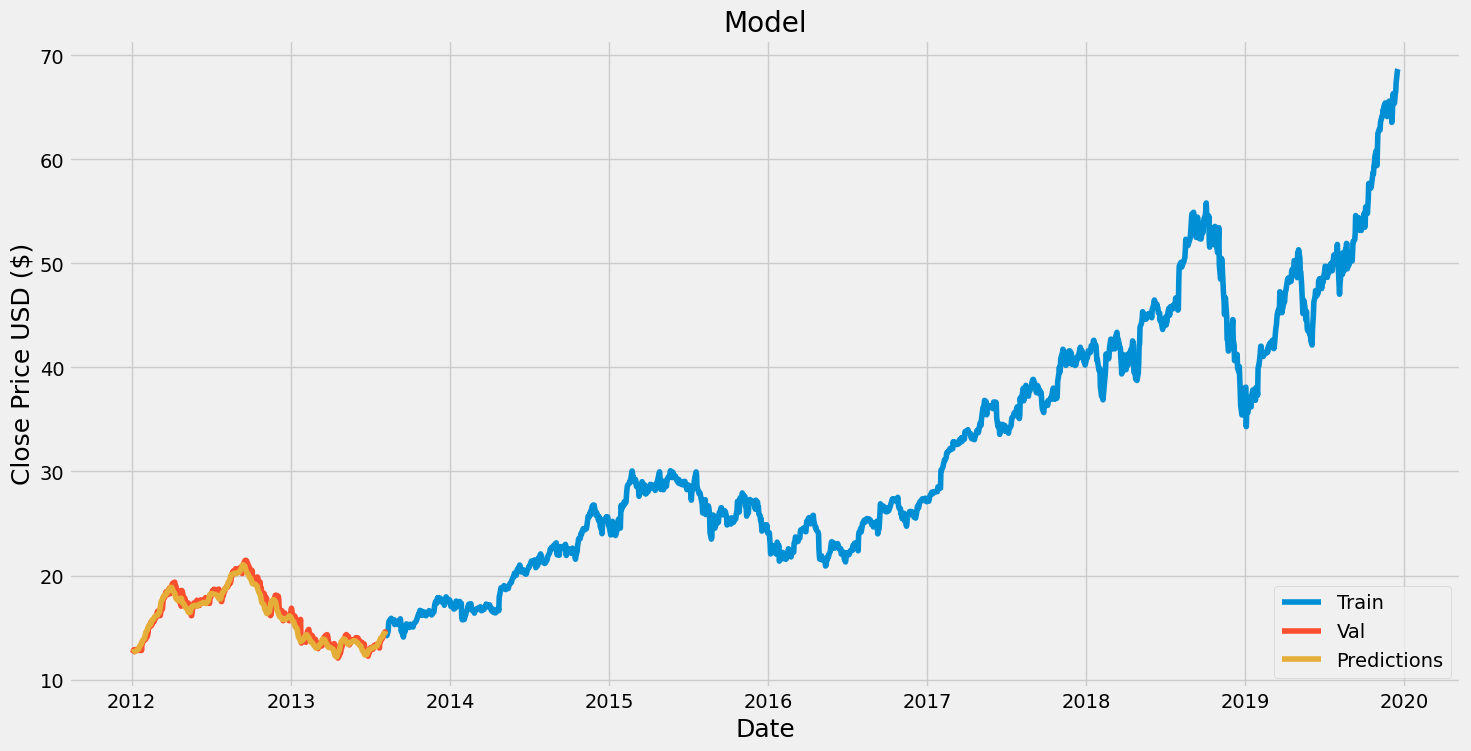

In [35]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [36]:
# Show the valid predicted prices
valid

,Close,Predictions
Date,,
2013-08-06,14.4679,14.660332
2013-08-05,14.5995,14.503195
2013-08-02,14.3841,14.400370
2013-08-01,14.2026,14.317934
2013-07-31,14.0721,14.236717
...,...,...
2012-01-09,12.8408,12.699552
2012-01-06,12.8608,12.687549
2012-01-05,12.7272,12.682038
